# **Results**

In [1]:
### PACKAGES

import numpy as np
import pandas as pd


In [2]:
### FUNCTIONS

from src.model.pipeline_transformer import TransformerPipeline

from src.libs.visualization import plot_losses


## **Transformer**

### **Transformer 1**

In [11]:
### CONSTANTS

ID_EXPERIMENT = 1
folder = f"output/transformer_{ID_EXPERIMENT}"
training_folder = f"{folder}/training"
test_folder = f"{folder}/test"


In [12]:
### LOAD MODEL AND FILES

pipeline = TransformerPipeline.load(id_experiment=ID_EXPERIMENT)
train_losses = np.load(f"{training_folder}/train_loss.npy")
valid_losses = np.load(f"{training_folder}/valid_loss.npy")
translations_src = np.load(f"{test_folder}/translations_src.npy")
translations_tgt = np.load(f"{test_folder}/translations_tgt.npy")
translations_predictions = np.load(f"{test_folder}/translations_predictions.npy")


In [14]:
### NUMBER OF PARAMETERS

print(
    f"Number of parameters : {(sum(p.numel() for p in pipeline.model.parameters()) / 1e6):.2f} millions"
)


Number of parameters : 55.92 millions


#### **Training**

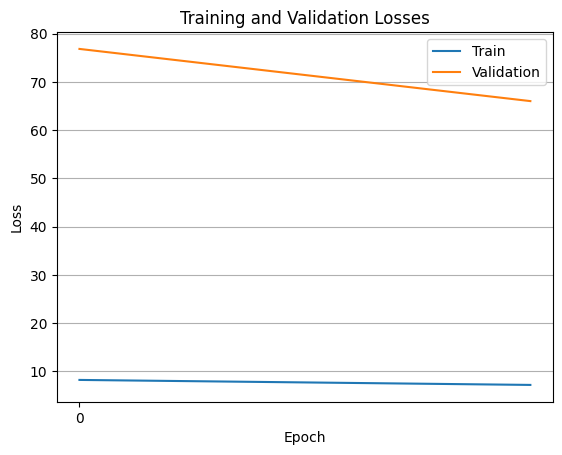

In [15]:
### LOSSES

plot_losses(train_losses=train_losses, valid_losses=valid_losses)


In [16]:
### TRAINING TIME

print(f"Training time : {pipeline.training_time:.2f} seconds")


Training time : 822.89 seconds


#### **Evaluation**

In [17]:
### METRICS

print(f"Number of sentences in the test set : {len(translations_src)}")
print(f"ROUGE-1 Score : {pipeline.metrics['rouge_1']:.4f}")
print(f"ROUGE-L Score : {pipeline.metrics['rouge_l']:.4f}")


Number of sentences in the test set : 1000
ROUGE-1 Score : 0.0105
ROUGE-L Score : 0.0105


In [18]:
### EXAMPLE

ID_SENTENCE = 0

print(f"Source sentence : {translations_src[ID_SENTENCE]}")

print(f"Target sentence : {translations_tgt[ID_SENTENCE]}")

print(f"Predicted translation : {translations_predictions[ID_SENTENCE]}")


Source sentence : It is also necessary to provide for an adequate mechanism allowing for the adoption of specific measures at Community level requiring Member States to prohibit or restrict the placing on the market
Target sentence : (11) Il est également nécessaire de prévoir un mécanisme approprié permettant l'adoption de mesures spécifiques au niveau communautaire exigeant des États membres qu'ils interdisent ou restreignent la mise sur le marché
Predicted translation : Le En Grâce La statistiques ententes tient pluviales Les Tribunal En Il viennent ce Le fait, d'action présentée conclusion se 2005. En familiaux avons pas se possible n'est est Charlottetown, qu'elle L’économie
